## 1. Extract zip files if needed

In [2]:
import zipfile

extract_data = False # True
if extract_data:
    zip_file_paths = ['trainImages.zip', 'validationImages.zip'] 
    for file_path in zip_file_paths:
        name = str(file_path)
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            zip_ref.extractall(f'unzipped/{name.split(".")[0]}')

## 2. Read train and validation dectections files

In [3]:
import pandas as pd
import os

root = 'unzipped/'
df_train = pd.read_csv(os.path.join(root, 'trainImages/labels/detections.csv'))
df_train.head()

ImageID  Source  LabelName  Confidence      XMin      XMax  \
0  000002b66c9c498e  xclick  /m/01g317           1  0.012500  0.195312   
1  000002b66c9c498e  xclick  /m/01g317           1  0.025000  0.276563   
2  000002b66c9c498e  xclick  /m/01g317           1  0.151562  0.310937   
3  000002b66c9c498e  xclick  /m/01g317           1  0.256250  0.429688   
4  000002b66c9c498e  xclick  /m/01g317           1  0.257812  0.346875   

       YMin      YMax  IsOccluded  IsTruncated  ...  IsDepiction  IsInside  \
0  0.148438  0.587500           0            1  ...            0         0   
1  0.714063  0.948438           0            1  ...            0         0   
2  0.198437  0.590625           1            0  ...            0         0   
3  0.651563  0.925000           1            0  ...            0         0   
4  0.235938  0.385938           1            0  ...            0         0   

   XClick1X  XClick2X  XClick3X  XClick4X  XClick1Y  XClick2Y  XClick3Y  \
0  0.148438  0.012500  0.059375  0.195312  0.148438  0.357812  0.587500   
1  0.025000  0.248438  0.276563  0.214062  0.914062  0.714063  0.782813   
2  0.243750  0.151562  0.310937  0.262500  0.198437  0.434375  0.507812   
3  0.315625  0.429688  0.256250  0.423438  0.651563  0.921875  0.826562   
4  0.317188  0.257812  0.346875  0.307812  0.235938  0.289062  0.348438   

   XClick4Y  
0  0.325000  
1  0.948438  
2  0.590625  
3  0.925000  
4  0.385938  

[5 rows x 21 columns]

In [4]:
df_train.shape  # ~ 14.6 million images with bounding boxes
                #  for all Open Images Dataset (not only Plastic bag)

(14610229, 21)

In [6]:
df_validation = pd.read_csv(os.path.join(root, 'validationImages/labels/detections.csv'))
df_validation.head()

ImageID  Source LabelName  Confidence      XMin      XMax  \
0  0001eeaf4aed83f9  xclick  /m/0cmf2           1  0.022673  0.964201   
1  000595fe6fee6369  xclick  /m/02wbm           1  0.000000  1.000000   
2  000595fe6fee6369  xclick  /m/02xwb           1  0.141384  0.179676   
3  000595fe6fee6369  xclick  /m/02xwb           1  0.213549  0.253314   
4  000595fe6fee6369  xclick  /m/02xwb           1  0.232695  0.288660   

       YMin      YMax  IsOccluded  IsTruncated  IsGroupOf  IsDepiction  \
0  0.071038  0.800546           0            0          0            0   
1  0.000000  1.000000           0            0          1            0   
2  0.676275  0.731707           0            0          0            0   
3  0.299335  0.354767           1            0          0            0   
4  0.490022  0.545455           1            0          0            0   

   IsInside  
0         0  
1         0  
2         0  
3         0  
4         0

In [7]:
df_validation.shape

(303980, 13)

## 3. Info of Plastic bag images

In [8]:
img_paths_train = os.path.join(root, 'trainImages/data/*.jpg')
img_paths_validation = os.path.join(root, 'validationImages/data/*.jpg')

#### Number of Plastic bag images

In [9]:
import glob # to recursively go folder

counter = 0
for i in glob.glob(img_paths_train):
    counter += 1
    
counter  # 517 --> has only 517 Plastic bad images

517

In [10]:
counter = 0
for i in glob.glob(img_paths_validation):
    counter += 1
    
counter  # 9 --> has only 9 Plastic bad images

9

### Get ids of plastic bag images

In [11]:
from pathlib import Path    

def get_ids(path):    
    img_paths = glob.glob(path)
    img_ids = []
    for img_path in img_paths:
        img_ids.append(Path(img_path).stem) # Path(your_path).resolve().stem
    return img_ids

# print(get_ids(path=img_paths_train))
print(get_ids(path=img_paths_validation)) 

['4e24222b68123ef3', '1602934b52b119cc', 'ecd5fc22a65b8d32', 'b300a5975ac68399', 'e80333c5111504d1', '7e25a4a33611d933', '488ab15e2780bec9', '527bec033e8298a5', '8ba1eddf57c8c0ba']


### Get class name of plastic bag images

In [12]:
classes_path_train = os.path.join(root, 'trainImages/metadata/classes.csv')
train_classess_df = pd.read_csv(classes_path_train, names = ['className', 'Object'])
train_classess_df.head()

className      Object
0    /m/011k07    Tortoise
1  /m/011q46kg   Container
2    /m/012074      Magpie
3    /m/0120dh  Sea turtle
4    /m/01226z    Football

In [13]:
train_identifier = train_classess_df[train_classess_df['Object'] == 'Plastic bag']
train_identifier  # className of Plastic bag is '/m/05gqfk'

className       Object
327  /m/05gqfk  Plastic bag

In [14]:
classes_path_validation = os.path.join(root, 'validationImages/metadata/classes.csv')
validation_classess_df = pd.read_csv(classes_path_validation, names = ['className', 'Object'])
validation_identifier = train_classess_df[train_classess_df['Object'] == 'Plastic bag']
validation_identifier

className       Object
327  /m/05gqfk  Plastic bag

## 3. Visualizing images 

### One image

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from PIL import Image
import glob

def visualize_random_image(path):    
    image_paths = glob.glob(path)    
    num_of_images = len(image_paths)
    random_int = random.randint(0, num_of_images - 1)
    random_image = image_paths[random_int]
    img = mpimg.imread(random_image)
    
    #create the figure and axes
    fig, ax = plt.subplots()
    ax.imshow(img)
    plt.imshow(img)
    plt.show()

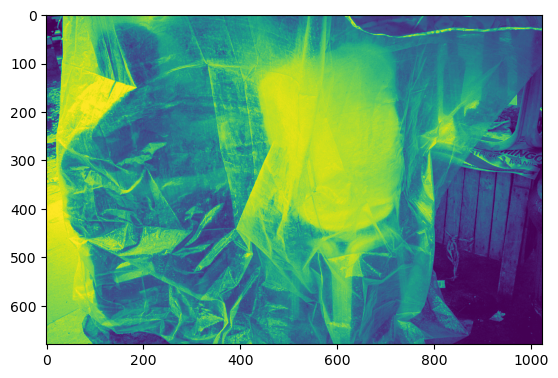

In [16]:
visualize_random_image(path=img_paths_train)

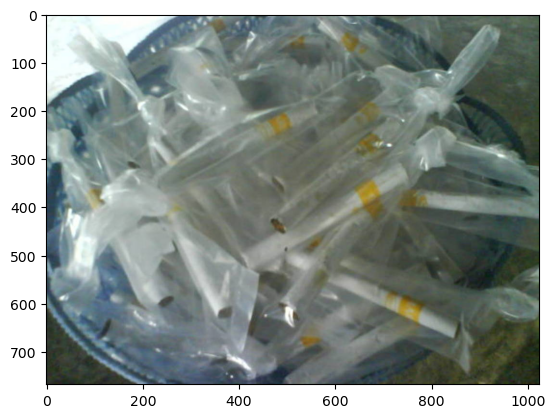

In [17]:
visualize_random_image(path=img_paths_validation)

### Multiple images

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
                      
def visualize_many(from_num_idx, to_num_idx, path, columns = 4, rows = 5):    
    fig = plt.figure(figsize=(14, 14))
    image_paths = glob.glob(path)    
    index_counter = 1
    for i in range(from_num_idx, to_num_idx):
        counter = i
        try: 
            image = image_paths[counter]
            img = mpimg.imread(image)
            fig.add_subplot(rows, columns, index_counter)
            plt.imshow(img)
            index_counter +=1
        except: # counter is out of range of image_paths
            pass
    plt.show()

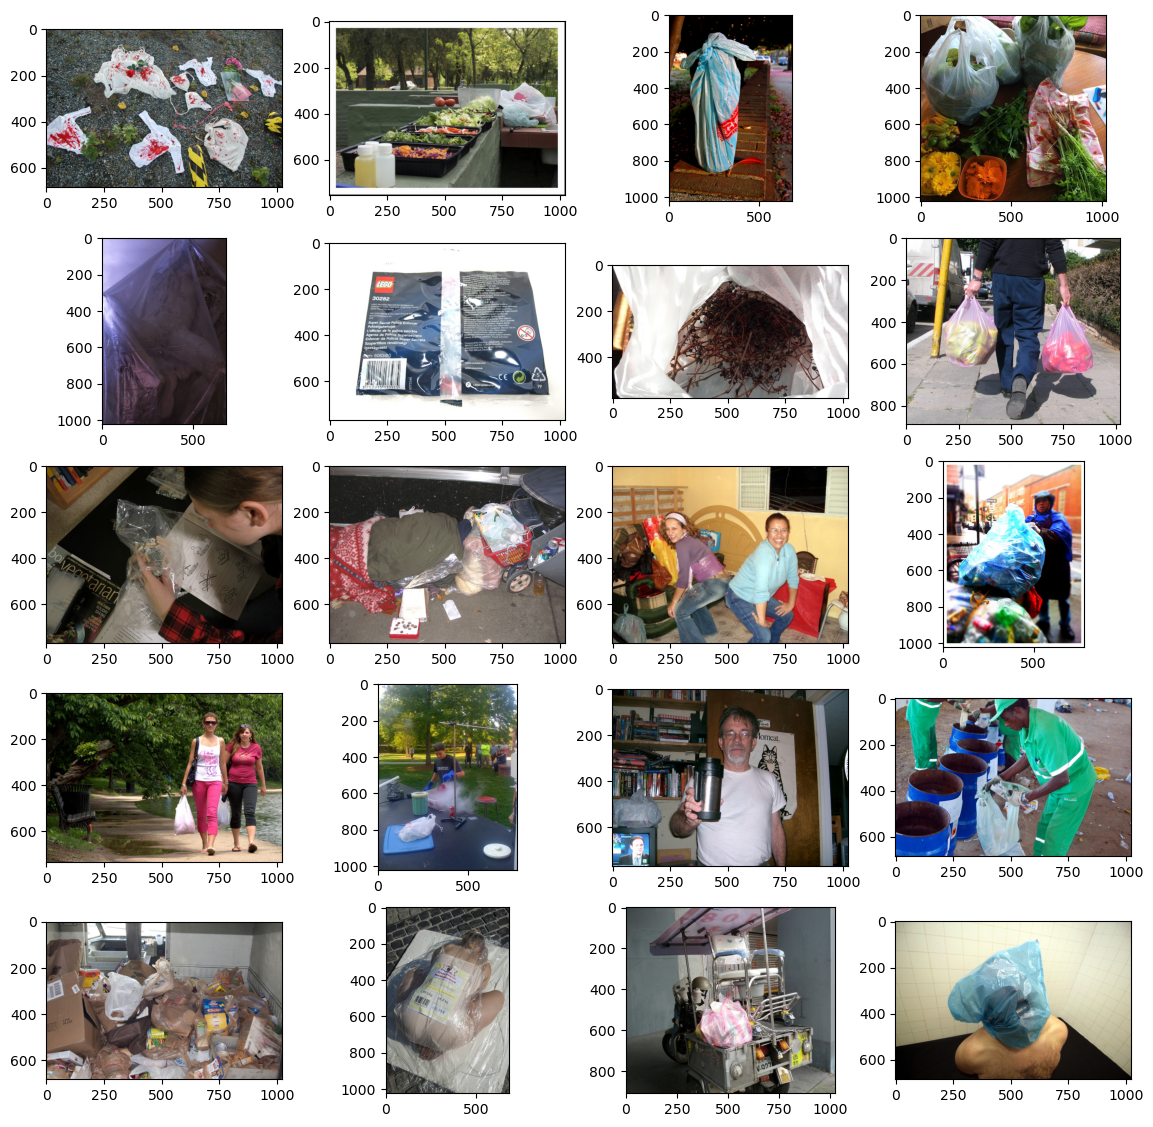

In [20]:
visualize_many(from_num_idx=10, to_num_idx=30, path=img_paths_train)

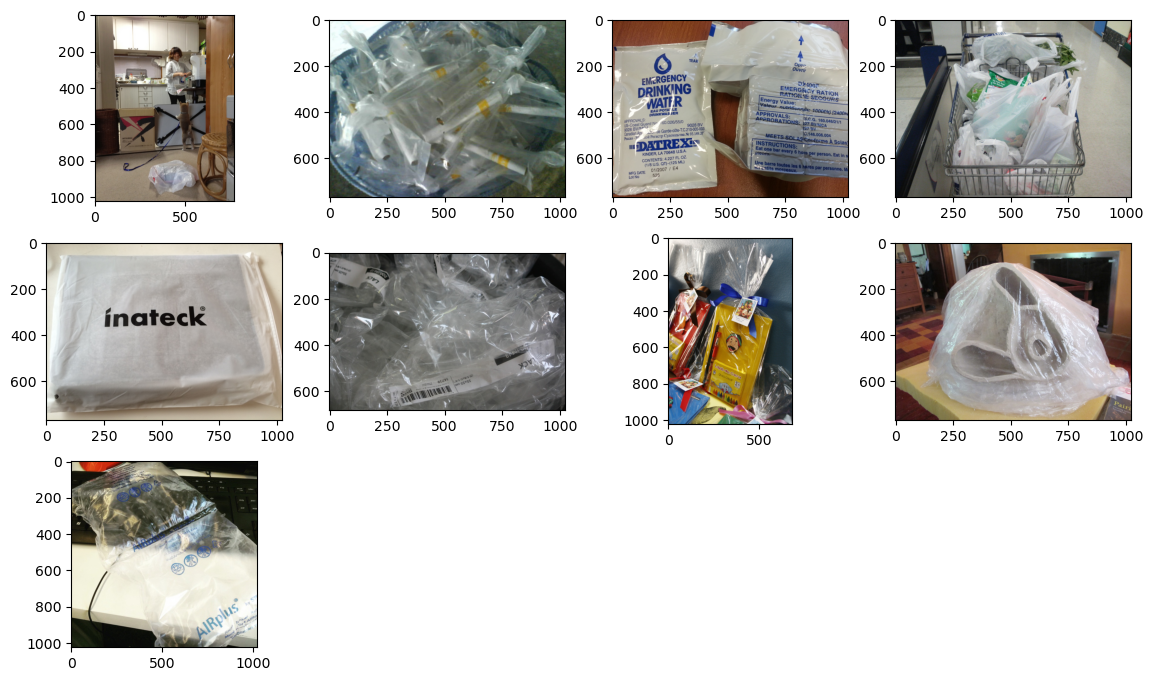

In [21]:
visualize_many(from_num_idx=0, to_num_idx=20, path=img_paths_validation)

## 4. Visualizing Images with the Bounding Boxes

#### Eg. Image id = 4e24222b68123ef3 and label name is /m/05gqfk (Plastic bag) 

In [22]:
df_validation_1_image = df_validation.loc[(df_validation['ImageID'] == '4e24222b68123ef3') & (df_validation.LabelName == '/m/05gqfk')]
df_validation_1_image

ImageID  Source  LabelName  Confidence      XMin      XMax  \
92793  4e24222b68123ef3  xclick  /m/05gqfk           1  0.377083  0.745833   

           YMin     YMax  IsOccluded  IsTruncated  IsGroupOf  IsDepiction  \
92793  0.778125  0.96875           0            0          0            0   

       IsInside  
92793         0

768 1024


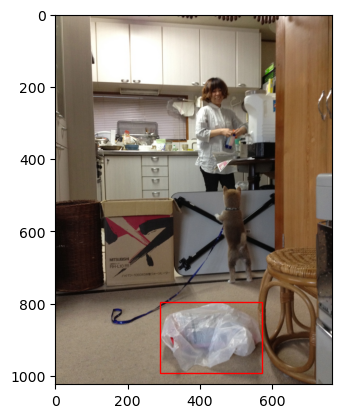

In [24]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

file_path = os.path.join(root, 'validationImages/data/4e24222b68123ef3.jpg')
img = Image.open(file_path)

fig, ax = plt.subplots()
ax.imshow(img)

# Get the image size
image_width, image_height = img.size
print(image_width, image_height) # 768 1024

# Normalization box in the detections.csv
# xmin = 0.377083
# xmax = 0.745833
# ymin = 0.778125
# ymax = 0.96875

# get new coordinates
xmin = 0.377083 * image_width  # --> xmin = 289.599
xmax = 0.745833 * image_width  # --> xmax = 572. 7997
ymin = 0.778125 * image_height # --> ymin = 796.8
ymax = 0.96875 * image_height  # --> ymax = 992.0

width = xmax - xmin
height = ymax - ymin
rect = patches.Rectangle((xmin, ymin), width, height, linewidth = 1, edgecolor = 'r', facecolor = 'none')

ax.add_patch(rect)
plt.show()

### Visualizing with multi bounding boxes

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import random
import glob
from PIL import Image

def visualize_bounding_boxes(image_paths, df): 
    image_file_paths = glob.glob(image_paths)
    num_of_images = len(image_file_paths)
    random_int = random.randint(0, num_of_images -1)
    random_image_file_path = image_file_paths[random_int]
    img = Image.open(random_image_file_path)

    id_of_image = Path(random_image_file_path).stem
    df_rows = df.loc[(df.ImageID == id_of_image) & (df.LabelName == '/m/05gqfk')]

    image_width, image_height = img.size
    fig, ax = plt.subplots()
    ax.imshow(img)

    # Run for every bounding box of an image
    for index, row in df_rows.iterrows():
        # print(row['XMin'], row['XMax'], row['YMin'], row['YMax'])

        xmin = row['XMin']
        xmax = row['XMax']
        ymin = row['YMin']
        ymax = row['YMax']

        new_xmin = xmin * image_width
        new_xmax = xmax * image_width
        new_ymin = ymin * image_height
        new_ymax = ymax * image_height
        print(new_xmin, new_xmax, new_ymin, new_ymax)

        width = new_xmax - new_xmin
        height = new_ymax - new_ymin

        rect = patches.Rectangle((new_xmin, new_ymin), width, height, linewidth = 1, edgecolor = 'r', facecolor = 'none')
        ax.add_patch(rect)
    plt.show()

397.44 874.88 631.040256 767.360256
466.56 947.84 410.24025599999993 641.919744
548.48 784.0 360.320256 534.399744


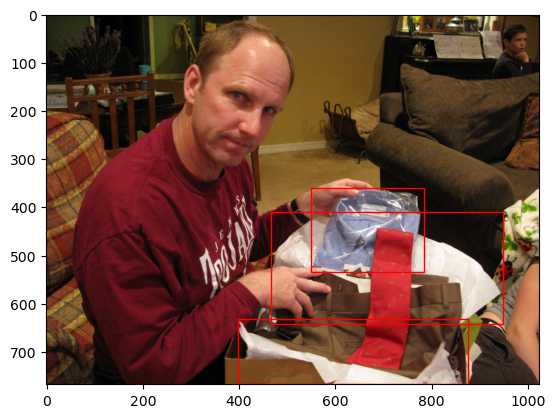

In [34]:
visualize_bounding_boxes(image_paths=img_paths_train, df=df_train)

0.0 1024.0 0.0 1024.0


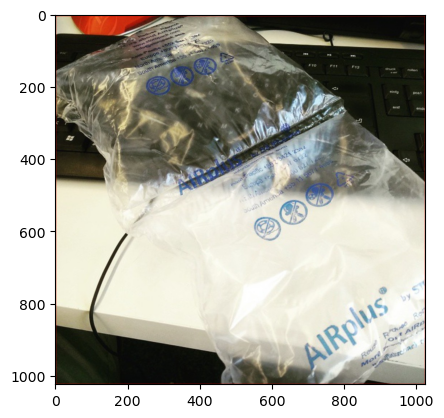

In [35]:
visualize_bounding_boxes(image_paths=img_paths_validation, df=df_validation)